In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef
)

from utils.UtilityFunctions import save_model,write_json_to_file

#-- Read Test and Train Files Generated in DataPrep.ipynb -------------------------
X_train = pd.read_csv("../data/split/X_train.csv")
X_test = pd.read_csv("../data/split/X_test.csv")  
y_train = pd.read_csv("../data/split/y_train.csv")
y_test = pd.read_csv("../data/split/y_test.csv")


#-- Decision Tree Classifier ------------------------------------------------------
# Initialize model with hyperparameters to prevent overfitting
model = DecisionTreeClassifier(
    criterion="entropy",  
    max_depth=12,          
    min_samples_split=10,  
    min_samples_leaf=5,    
    random_state=42
)

#-- Train the model   ------------------------------------------------------
model.fit(X_train, y_train)

#-- Save the trained model ------------------------------------------------------
trained_model_path="trained_models/DecisionTreeModel.pkl"
save_model(model, trained_model_path)

#-- Predictions and Probabilities ----------------------------------------------
y_pred_dt = model.predict(X_test)
y_prob_dt = model.predict_proba(X_test)

#-- Evaluation Metrics ----------------------------------------------------------
dt_metrics = {
    "ML Model Name": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "AUC": roc_auc_score(
        y_test, y_prob_dt, multi_class="ovr", average="macro"
    ),
    "Precision": precision_score(y_test, y_pred_dt, average="macro"),
    "Recall": recall_score(y_test, y_pred_dt, average="macro"),
    "F1": f1_score(y_test, y_pred_dt, average="macro"),
    "MCC": matthews_corrcoef(y_test, y_pred_dt)
}

dt_metrics
write_json_to_file(dt_metrics, "../metrics/DecisionTreeMetrics.json")

True

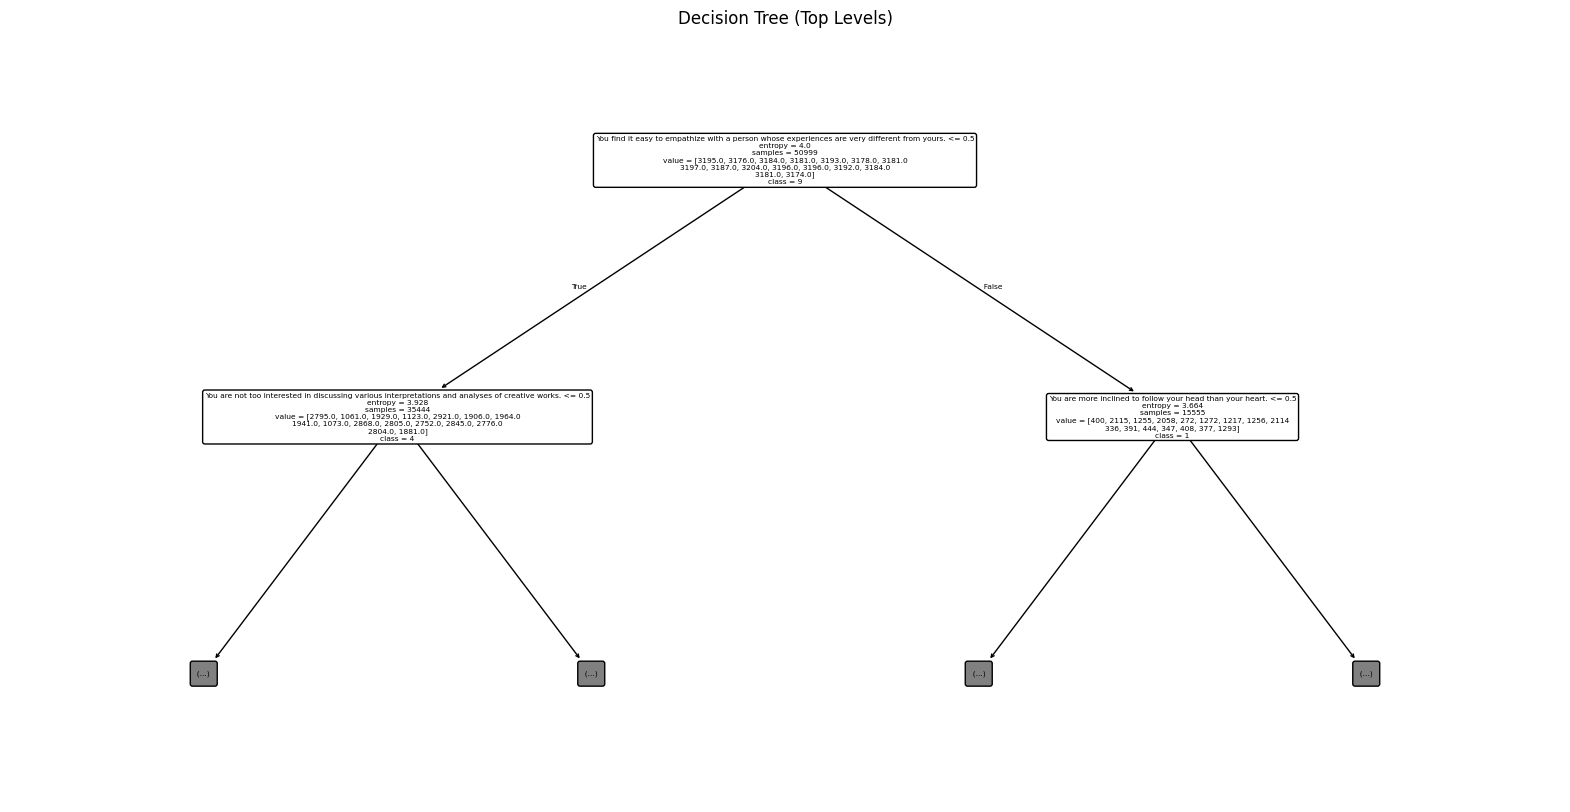

In [13]:
#-- Visualize the Decision Tree ------------------------------------------------
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=[str(i) for i in model.classes_],
    filled=True,
    rounded=True,
    max_depth=1 
)


plt.title("Decision Tree (Top Levels)")
plt.show()
